In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='Latin-1')
display(telco.head(), telco.tail())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Convert SeniorCitizen to object
telco['SeniorCitizen'] = telco['SeniorCitizen'].apply(str)

#convert TotalCharges to float
telco = telco.replace(r'^\s*$', np.nan, regex=True)
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce') 

telco.drop(['customerID'],axis=1, inplace=True)

In [ ]:
services_col = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
              "StreamingTV", "StreamingMovies", "Churn"]
accounts_col = ["tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]
demographics_col = ["gender", "SeniorCitizen", "Partner", "Dependents", "Churn"]

# Question 1. Demographic:

a) Which 2 demographics have proven to be the most popular with the telco brand?


In [ ]:
def countplot_ratio(x,data,hue=None,ax=None):
    ax=sns.countplot(x,data=data,hue=hue,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
    ax.set_title(x + " Distributions")
    ax.legend(bbox_to_anchor=(1.01,1))
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2f}%'.format((height/total)*100),fontsize=12, weight = 'bold',ha="center") 

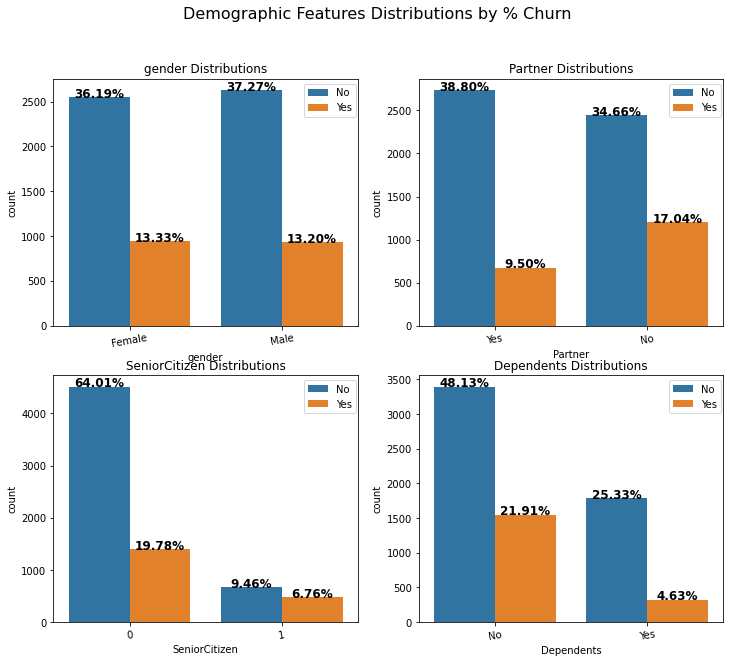

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10))
fig.suptitle('Demographic Features Distributions by % Churn',fontsize=16)
for i, col in enumerate(demographics_col[0:-1]):    
    if i < 2:
        countplot_ratio(col, telco[demographics_col],hue="Churn",ax=axes[i,0])
    elif i >=2:
         countplot_ratio(col, telco[demographics_col],hue="Churn",ax=axes[i-2,1])

Note:
1. Churn rate is almost equal for males and females.
2. Young people are majority of the customers.
3. Churn rate is highest between No-Dependents and No-Partner

a) The 2 demographics that have proven to be the most popular with the telco brand are Young people(No-SeniorCitizen) and people with no dependants(No-Dependents)

b) If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

- They should target young people with partners and no dependants

# Question 2. Services:

a) Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)


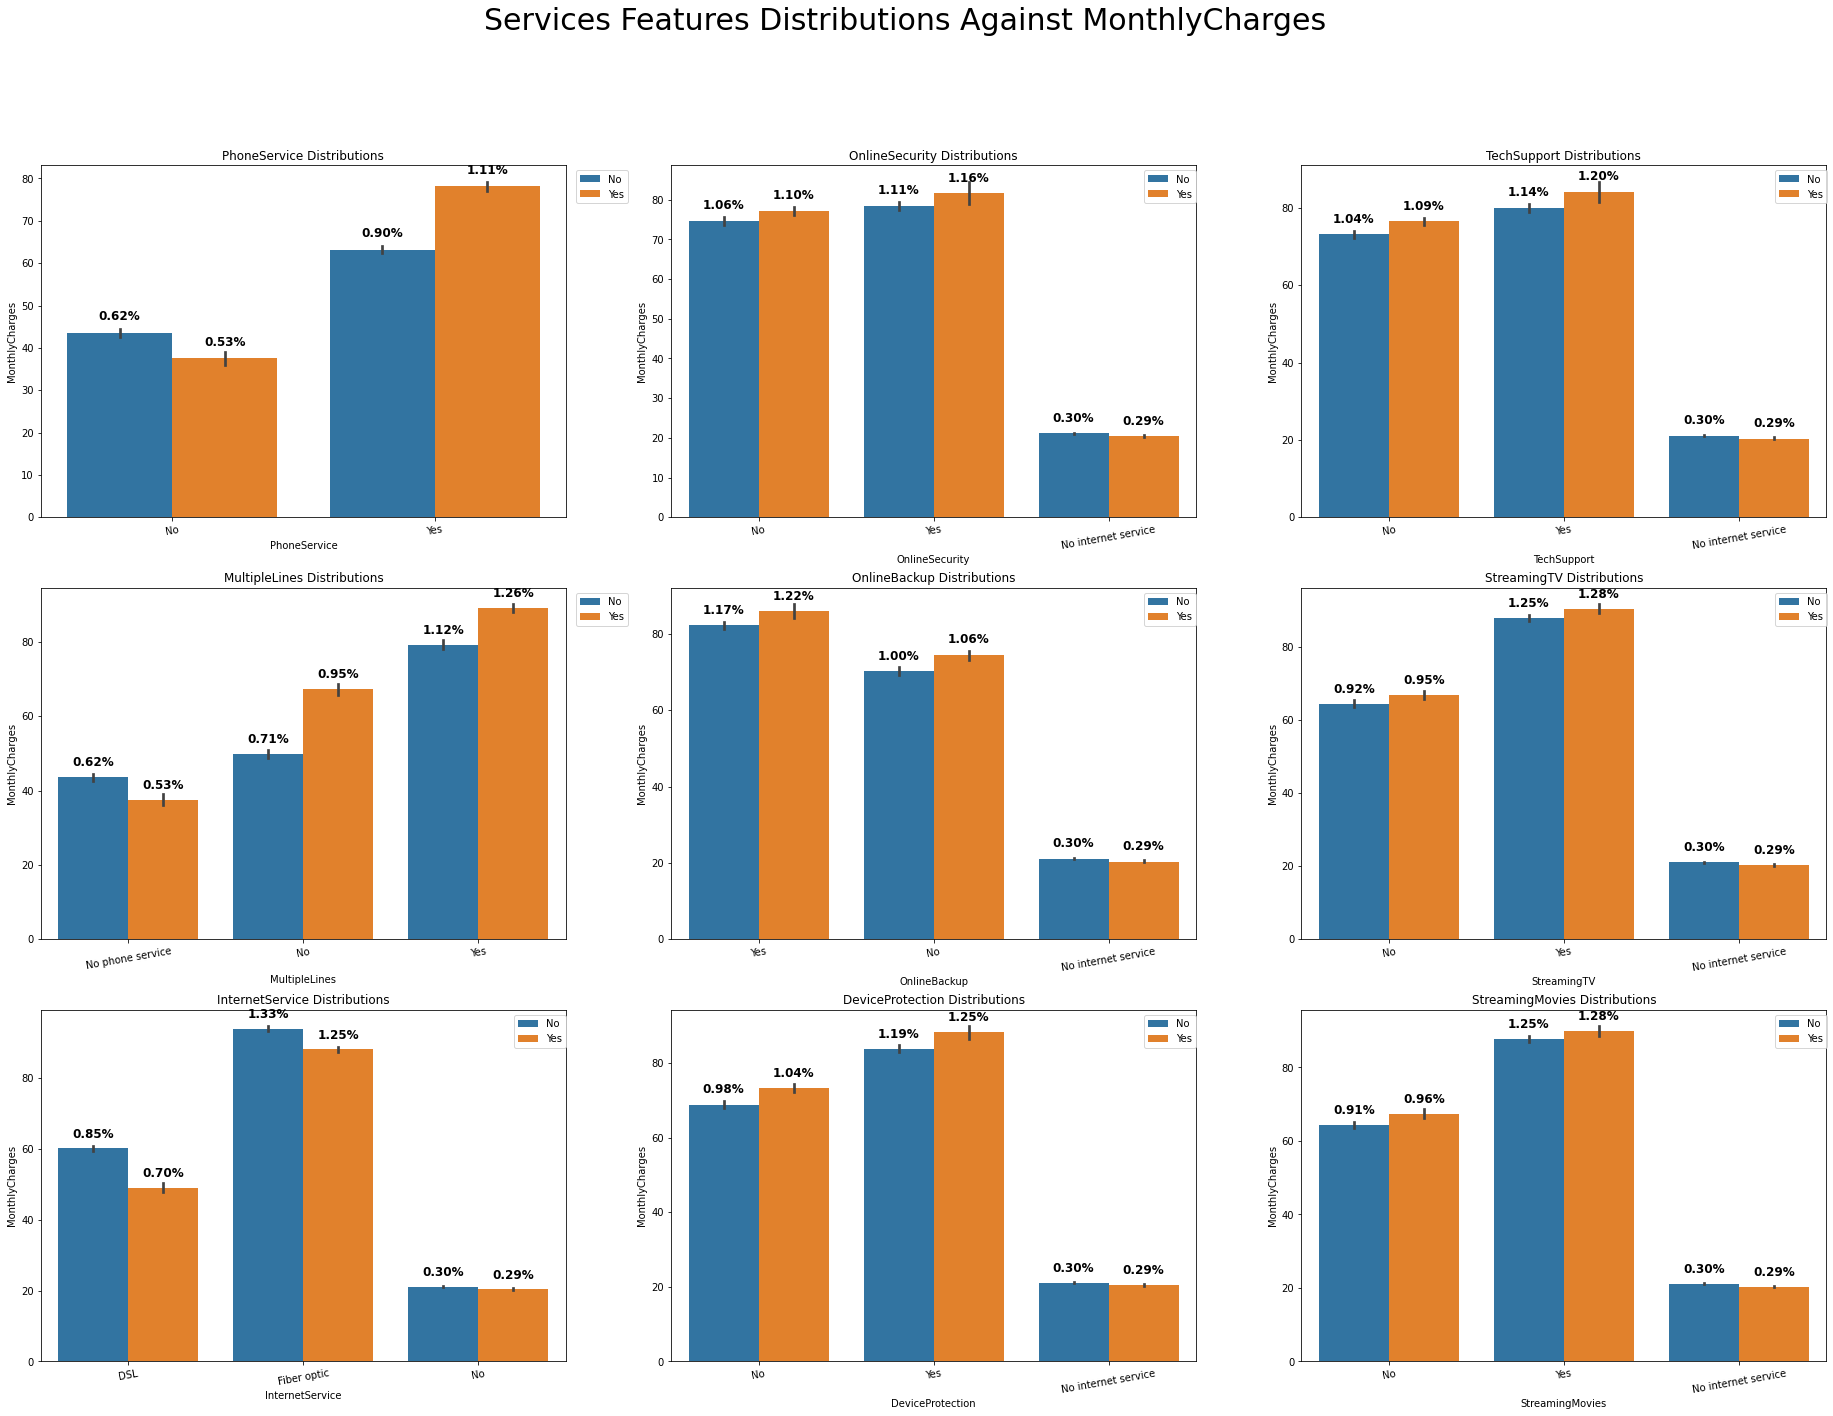

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (32,22))
fig.suptitle('Services Features Distributions Against MonthlyCharges',fontsize=30)      

for i, col in enumerate(services_col[0:-1]):    
    if i < 3:
        ax = sns.barplot(y=telco['MonthlyCharges'], x=telco[col], hue=telco["Churn"], ax=axes[i,0] )
        ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
        ax.set_title(col + " Distributions")
        ax.legend(bbox_to_anchor=(1.01,1))
       
    elif i >=3 and i < 6:
        ax = sns.barplot(y=telco['MonthlyCharges'], x=telco[col], hue=telco["Churn"], ax=axes[i-3,1] )
        ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
        ax.set_title(col + " Distributions")
        ax.legend(bbox_to_anchor=(1.01,1))

    elif i >=6:
        ax = sns.barplot(y=telco['MonthlyCharges'], x=telco[col], hue=telco["Churn"], ax=axes[i-6,2] )
        ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
        ax.set_title(col + " Distributions")
        ax.legend(bbox_to_anchor=(1.01,1))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / float(len(telco))) * 100), fontsize=12, weight='bold',ha="center") 


- StreamingTv, StreamingMovies, MultipleLines, DeviceProtection contribute to higher monthly charges and encourage churning

b) If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

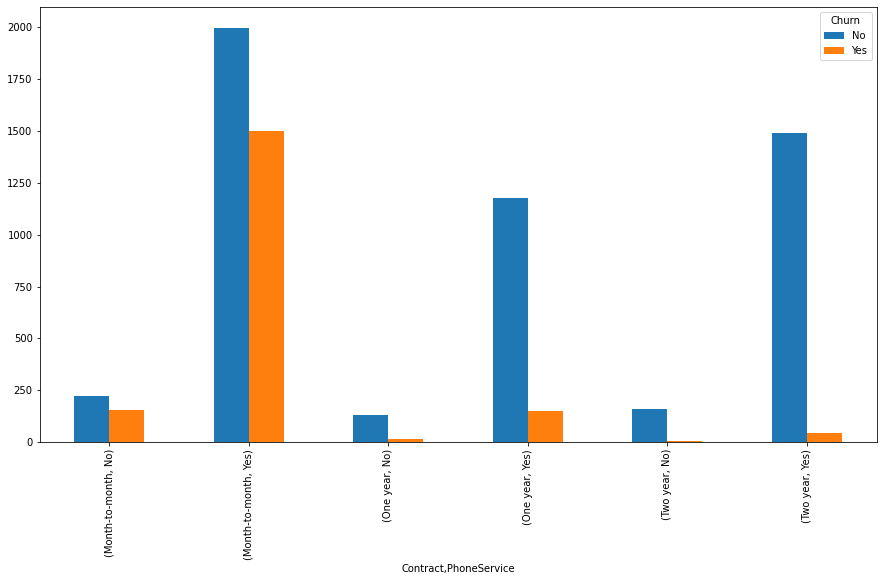

In [ ]:
telco.groupby(['Contract','PhoneService']).Churn.value_counts().unstack().plot(kind='bar', figsize=(15, 8))

Churn,No,Yes
Contract,,
Month-to-month,1997,1502
One year,1176,152
Two year,1489,45


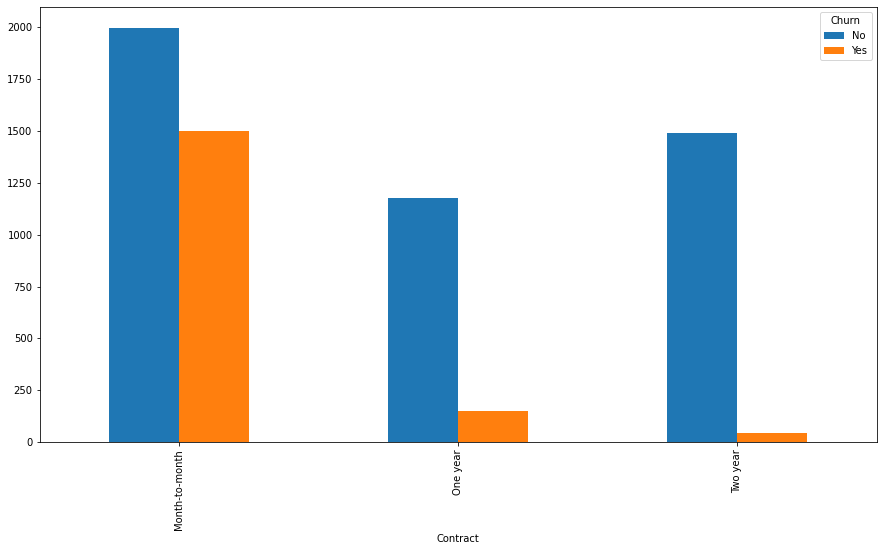

In [ ]:
retain_df = telco.query("PhoneService == 'Yes'").groupby(['Contract', 'Churn']).size().unstack()
display(retain_df)
retain_df.plot(kind='bar', figsize=(15, 8))

- Comparing the Difference in churn rates and no churn rates between the three contracts, it is safe to say that people with longer contracts tend to stay loyal with the brand therefore if phone was to be offered as a standalone service, a 2-year contract would encourage customer retention

#Question 3. Payment: (Use visualizations in explaining your analysis)

a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium


In [ ]:
basic, plus, premium = np.percentile(telco['MonthlyCharges'], [25 , 50, 75])
display(basic, plus, premium)

35.5

70.35

89.85

Text(0.5, 0, 'Monthly Charges')

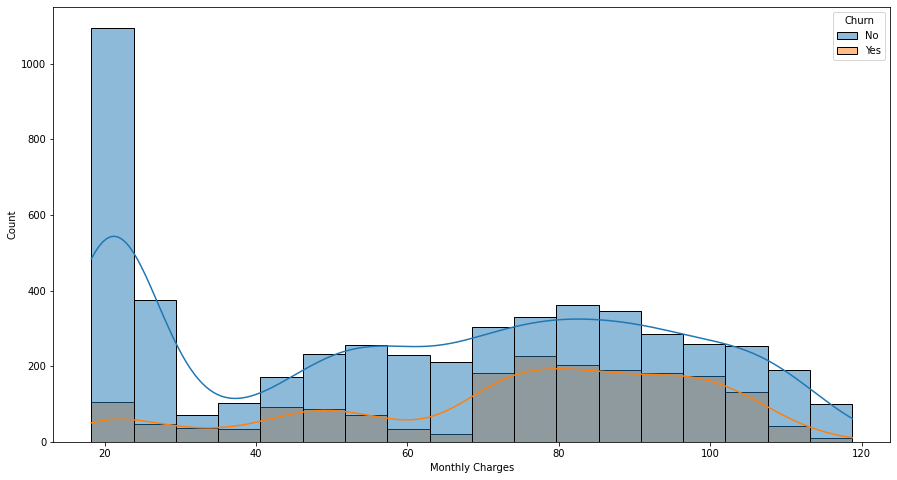

In [78]:
plt.figure(figsize=(15, 8 ))
ax = sns.histplot(data=telco, x=telco['MonthlyCharges'], kde=True, hue=telco['Churn'])
ax.set_ylabel('Count')
ax.set_xlabel('Monthly Charges')

- Basic Bouquet = 35.500000
- Plus Bouquet = 70.350000
- Premium Bouquet = 89.850000


b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

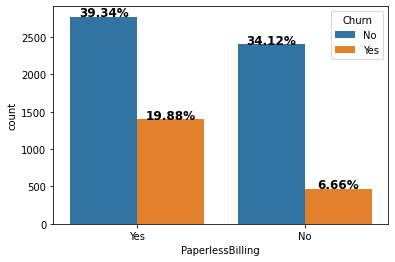

In [ ]:
ax = sns.countplot(x=telco['PaperlessBilling'], hue=telco["Churn"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2f}%'.format((height / float(len(telco))) * 100), fontsize=12, weight = 'bold',ha="center") 

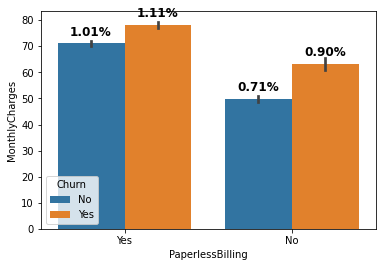

In [ ]:
ax = sns.barplot(y=telco['MonthlyCharges'], x=telco['PaperlessBilling'], hue=telco["Churn"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2f}%'.format((height / float(len(telco))) * 100), fontsize=12, weight = 'bold',ha="center") 

- The company should NOT strictly go paperless for their monthly billing since from the above charts, paperless billing incurs higher monthly charges and a customer who uses paperless billing is more likely to churn than one who doesn't